In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
df=pd.read_csv("MagicBricks.csv")
df = df.replace(r'^\s*$', np.nan, regex=True)
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Location
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,6667,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667,NaN
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667,NaN
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667,NaN
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667,NaN


In [4]:
df.shape

(1259, 12)

In [5]:
df['Area'].unique()

array([  800.    ,   750.    ,   950.    ,   600.    ,   650.    ,
        1300.    ,  1350.    ,   985.    ,  1100.    ,   870.    ,
         630.    ,   660.    ,   344.4448,   550.    ,  1150.    ,
         850.    ,   900.    ,   430.556 ,   914.9315,   500.    ,
          28.    ,  2160.    ,  1500.    ,  1080.    ,  1450.    ,
         810.    ,  1710.    ,  1650.    ,  1280.    ,  1260.    ,
        1130.    ,  1000.    ,  2925.    ,  1600.    ,  1143.    ,
        8000.    ,   890.    ,  1387.    ,  1050.    ,  1200.    ,
         700.    ,  1700.    ,  1550.    ,  1400.    ,  1900.    ,
        1850.    ,  1800.    ,  1620.    ,  1540.    ,  2300.    ,
        1560.    ,   400.    ,  1525.    ,  2200.    ,  2880.    ,
        2700.    ,  1575.    ,  1675.    ,   825.    ,   875.    ,
         450.    ,   100.    ,    75.    ,   270.    ,   444.    ,
         729.    ,  4050.    ,  2400.    ,   405.    ,   666.    ,
        1360.    ,  2170.    ,   720.    ,  1030.    ,   350. 

In [ ]:
df['Area'].value_counts()

900.0      67
1500.0     50
1800.0     48
1000.0     42
1600.0     38
           ..
150.0       1
3250.0      1
4000.0      1
5500.0      1
11050.0     1
Name: Area, Length: 315, dtype: int64

In [6]:
df1 = df.drop(['Area','Locality'],axis='columns')
df1.shape

(1259, 10)

In [7]:
df2 = df1.dropna()
df2.isnull().sum()

BHK            0
Bathroom       0
Furnishing     0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
Location       0
dtype: int64

In [8]:
df2['BHK'] = df2['BHK'].apply(lambda x: int(x.split(' ')[0]))
df2.bhk.unique()

AttributeError: ignored

In [9]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [10]:
df2[~df2['Per_Sqft'].apply(is_float)].head(10)

,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft,Location


In [11]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [12]:
df3 = df2.copy()
df3= df3.replace(r'^\s*$', np.nan, regex=True)
df3.Per_Sqft = df3.Per_Sqft.apply(convert_sqft_to_num)
df3 = df3[df3.Per_Sqft.notnull()]
df3.head(2)

,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft,Location
10,3,2.0,Semi-Furnished,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6154.0,Rohini
11,3,2.0,Semi-Furnished,1.0,7700000,Ready_to_move,New_Property,Builder_Floor,6154.0,Rohini


In [13]:
df3.loc[30]

KeyError: ignored

In [14]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['Price']*100000/df4['Per_Sqft']
df4.head()


,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft,Location,price_per_sqft
10,3,2.0,Semi-Furnished,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6154.0,Rohini,1.007475e+08
11,3,2.0,Semi-Furnished,1.0,7700000,Ready_to_move,New_Property,Builder_Floor,6154.0,Rohini,1.251219e+08
12,2,2.0,Semi-Furnished,1.0,5500000,Ready_to_move,New_Property,Builder_Floor,6154.0,Rohini,8.937277e+07
13,2,2.0,Semi-Furnished,1.0,5000000,Ready_to_move,Resale,Builder_Floor,6154.0,Rohini,8.124797e+07
14,2,2.0,Semi-Furnished,1.0,3310000,Ready_to_move,Resale,Builder_Floor,6154.0,Rohini,5.378616e+07


In [15]:
df5_stats = df4['price_per_sqft'].describe()
df5_stats

count    1.630000e+02
mean     2.026167e+08
std      1.914913e+08
min      5.000000e+06
25%      7.818655e+07
50%      1.431818e+08
75%      2.758254e+08
max      1.200000e+09
Name: price_per_sqft, dtype: float64

In [16]:
df4.Location = df4.Location.apply(lambda x: x.strip())
location_stats = df4['Location'].value_counts(ascending=False)
location_stats

Rohini          60
Lajpat Nagar    58
Dwarka          29
Budh Vihar      16
Name: Location, dtype: int64

In [17]:
df5 = df4[~(df4.Per_Sqft/df4.BHK<300)]
df5.shape

(162, 11)

In [18]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(130, 11)

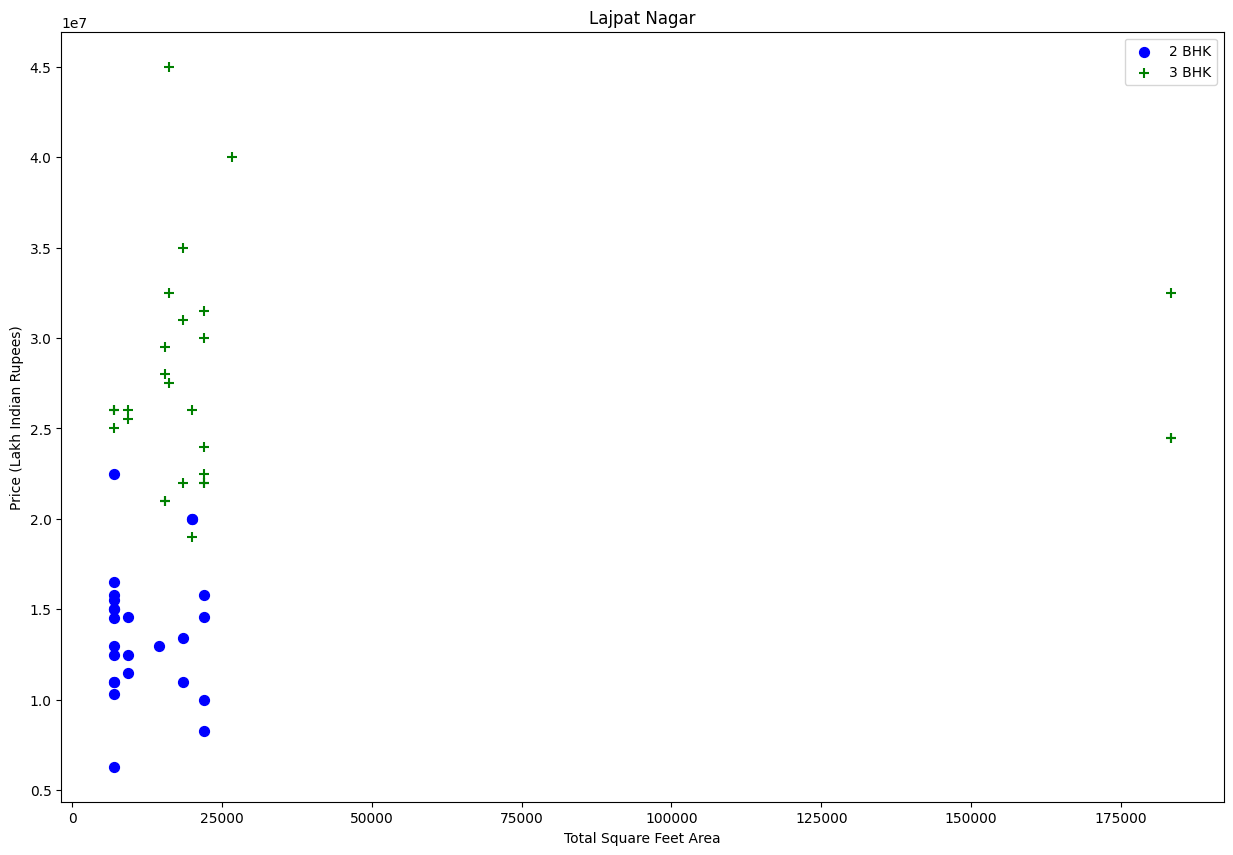

In [19]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.Location==location) & (df.BHK==2)]
    bhk3 = df[(df.Location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.Per_Sqft,bhk2.Price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.Per_Sqft,bhk3.Price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df6,"Lajpat Nagar")

In [20]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for Location, location_df in df.groupby('Location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df6)
# df8 = df7.copy()
df8.shape

(109, 11)

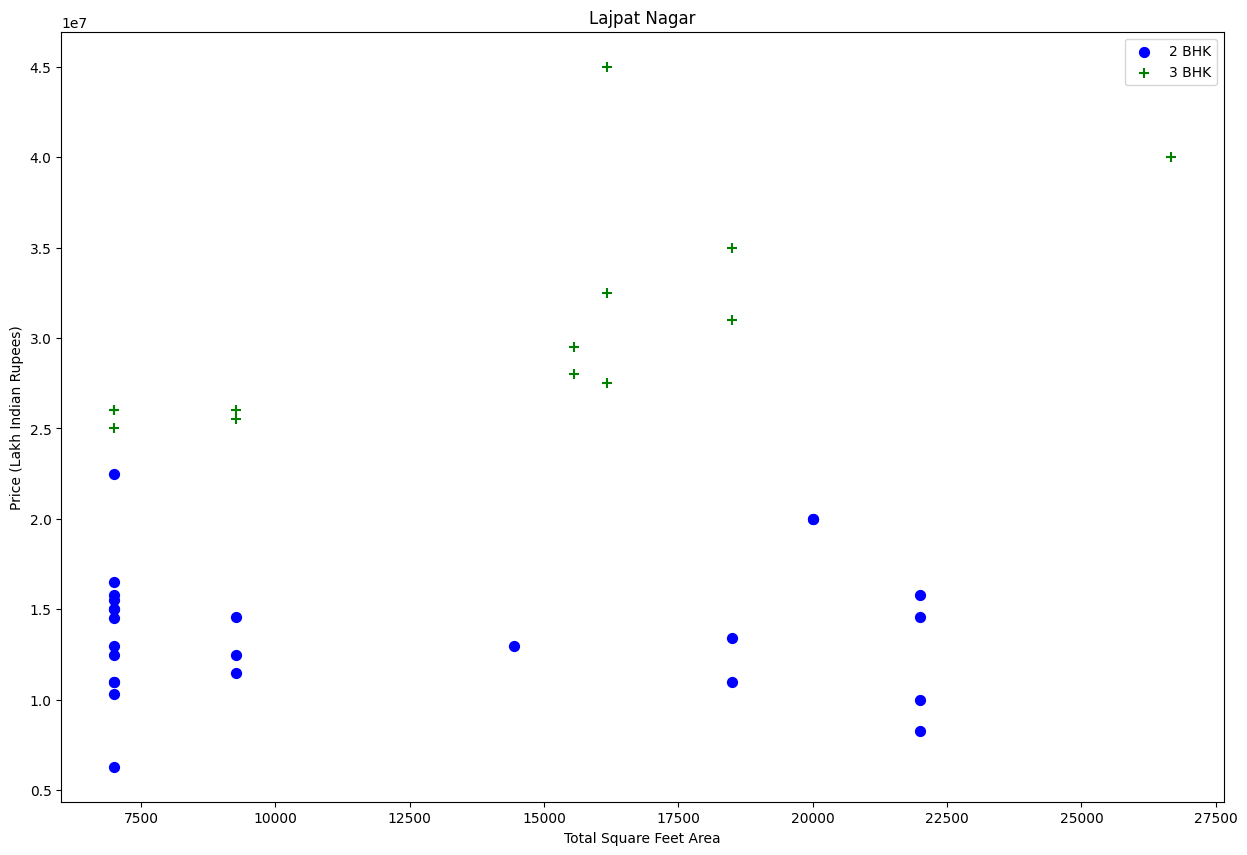

In [21]:
plot_scatter_chart(df8,"Lajpat Nagar")

Text(0, 0.5, 'Count')

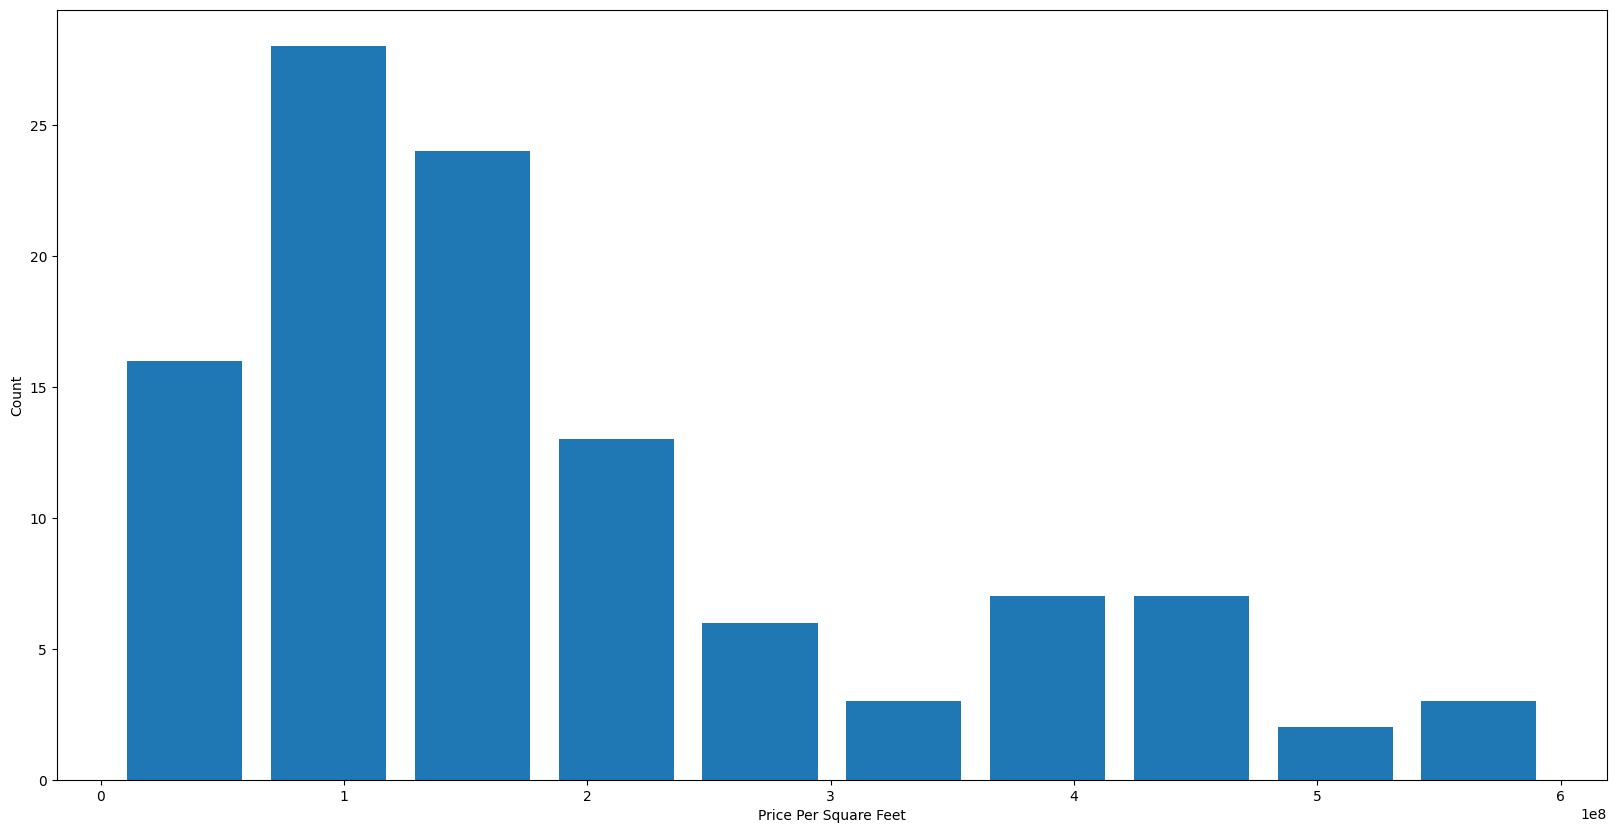

In [22]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

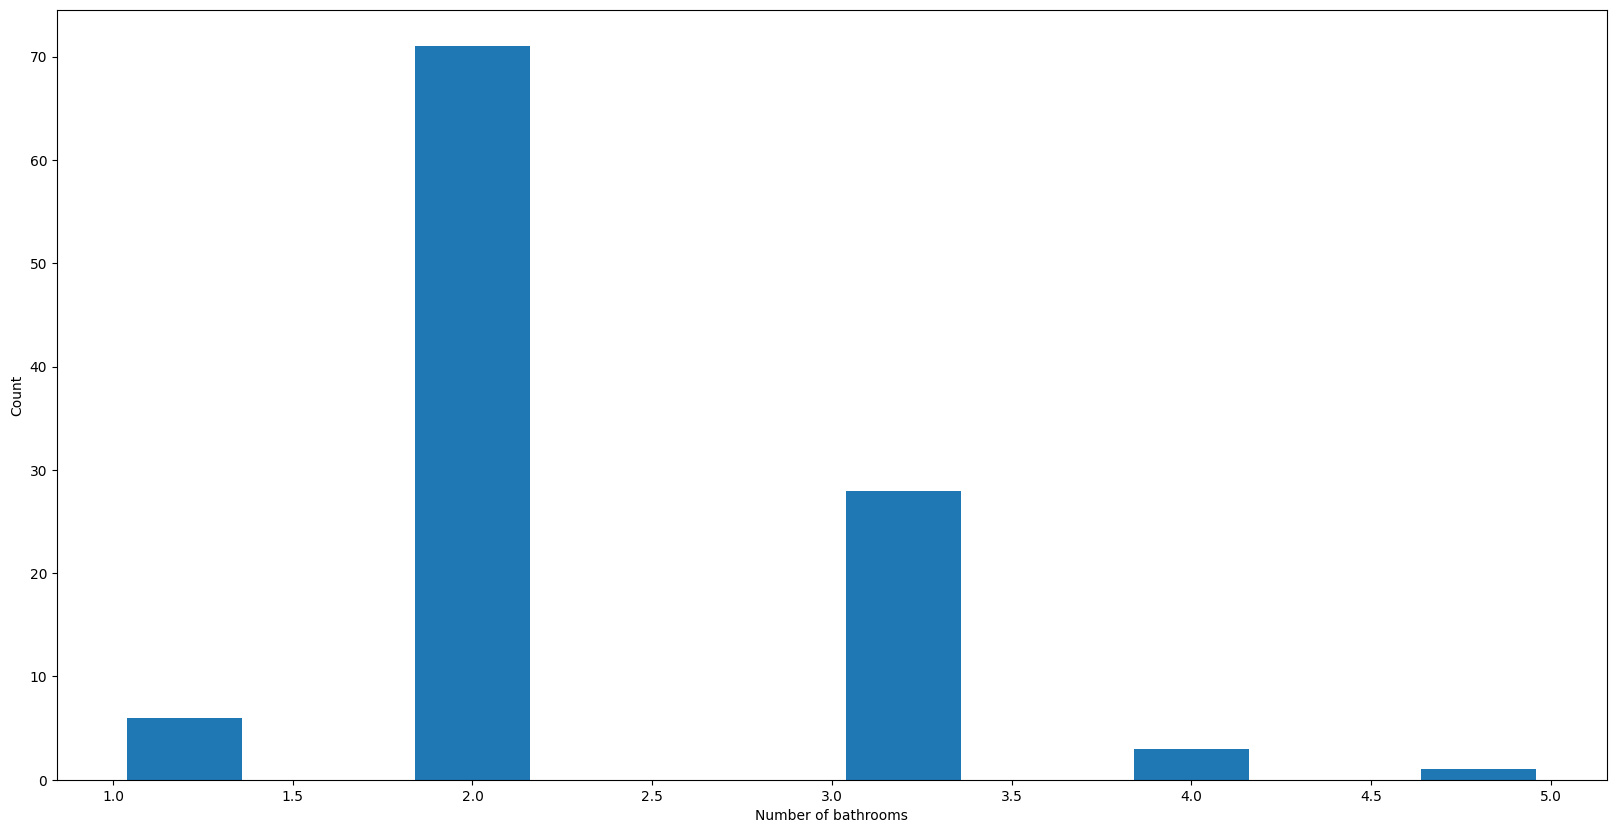

In [23]:
plt.hist(df8.Bathroom,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [24]:
df8[df8.Bathroom>10]

,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft,Location,price_per_sqft


In [25]:
df9 = df8[df8.Bathroom<df8.BHK+2]
df9.shape

(109, 11)

In [26]:
df10 = df9.drop('Location',axis='columns')
df10.head(2)

,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft,price_per_sqft
0,2,1.0,Unfurnished,1.0,3600000,Ready_to_move,Resale,Builder_Floor,72000.0,5.000000e+06
2,3,2.0,Semi-Furnished,1.0,4000000,Ready_to_move,Resale,Builder_Floor,4444.0,9.000900e+07


In [27]:
df10.shape

(109, 10)

In [28]:
X = df10.drop(['Price'],axis='columns')
X.head(3)

,BHK,Bathroom,Furnishing,Parking,Status,Transaction,Type,Per_Sqft,price_per_sqft
0,2,1.0,Unfurnished,1.0,Ready_to_move,Resale,Builder_Floor,72000.0,5.000000e+06
2,3,2.0,Semi-Furnished,1.0,Ready_to_move,Resale,Builder_Floor,4444.0,9.000900e+07
3,2,2.0,Semi-Furnished,1.0,Ready_to_move,Resale,Apartment,3300.0,5.000000e+07


In [29]:
X.shape

(109, 9)

In [30]:
y = df10.Price
y.head(3)

0    3600000
2    4000000
3    1650000
Name: Price, dtype: int64

In [31]:
len(y)

109

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [33]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

ValueError: ignored

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

In [34]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

NameError: ignored

In [35]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [37]:
import pickle
with open('Delhi_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)